In [17]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics as mat
from sklearn.model_selection import GridSearchCV
%matplotlib notebook

In [2]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
def datecreate(lst):
    lst = lst.split('/')
    return dt.datetime(year=int(lst[2]),month=int(lst[1]),day=int(lst[0])).date()

In [4]:
def time_to_num(lst):
    lst = lst.split(':')
    return int(lst[0])*60+int(lst[1])

In [5]:
def duration_to_num(lst):
    h=0
    m=0
    lst=lst.split(' ')
    if len(lst)==2:
        h=int(lst[0].replace('h',''))
        m=int(lst[1].replace('m',''))
    elif len(lst)==1:
        if 'h' in lst[0]:
            h=int(lst[0].replace('h',''))
        else:
            m=int(lst[0].replace('m',''))
    return h*60+m

In [6]:
def switch(arg):
    switcher = {
        'non-stop':0,
        '1 stop':1,
        '2 stops':2,
        '3 stops':3,
        '4 stops':4
    }
    return switcher.get(arg, 0)

In [7]:
def transform(df):
    df['Date_of_Journey']=df['Date_of_Journey'].apply(lambda x: datecreate(x))
    df.loc[df['Destination']=='New Delhi','Destination']='Delhi'
    df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:time_to_num(x[:5]))
    df['Dep_Time']=df['Dep_Time'].apply(lambda x:time_to_num(x[:5]))
    df['Duration']=df['Duration'].apply(lambda x: duration_to_num(x))
    df['Total_Stops'].fillna(0, inplace=True)
    df['Total_Stops']=df['Total_Stops'].apply(lambda x: switch(x))
    #df = df.loc[df['Total_Stops']!=-1,:]
    df['Day']=df['Date_of_Journey'].apply(lambda x: x.weekday())
    df['journey']=df.apply(lambda x: x['Source']+'-'+x['Destination'],axis=1)
    idx = train.loc[train['Route']!=train['Route'],:].index.values.astype(int)
    if len(idx)>0:
        df=df.drop(idx)
    return df

In [8]:
train = pd.read_excel('Data_Train.xlsx')
test= pd.read_excel('Test_set.xlsx')

In [9]:
train=transform(train)

In [10]:
airlines=train.groupby('Airline')['Price'].median().reset_index()
airlines.columns=['Airline2','wAirline']
train=train.merge(airlines,how='left',left_on='Airline',right_on='Airline2')
journey=train.groupby('journey')['Price'].median().reset_index()
journey.columns=['journey','wJourney']
train=train.merge(journey,how='left',left_on='journey',right_on='journey')
days=train.groupby('Day')['Price'].median().reset_index()
days.columns=['Day','wDay']
train=train.merge(days,how='left',left_on='Day',right_on='Day')

In [234]:
test=transform(test)

In [338]:
test=test.merge(airlines,how='left',left_on='Airline',right_on='Airline2')
test=test.merge(journey,how='left',left_on='journey',right_on='journey')
test=test.merge(days,how='left',left_on='Day',right_on='Day')

In [231]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,journey
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,1050,265,655,1,No info,3,Delhi-Cochin
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,380,620,240,1,No info,6,Kolkata-Banglore
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,1155,1140,1425,1,In-flight meal not included,1,Delhi-Cochin
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,480,1260,780,1,No info,1,Delhi-Cochin
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,1435,165,170,0,No info,0,Banglore-Delhi


In [14]:
columns = ['Dep_Time','Arrival_Time','Duration','Total_Stops','wAirline','wJourney','wDay']
X=train.loc[:,columns].values
y=train['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [15]:
train.loc[train['Route']!=train['Route'],:].index.values.astype(int)

array([], dtype=int64)

In [18]:
lm= linear_model.LinearRegression(normalize=True)#linear_model.LinearRegression(normalize=True)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [22]:
############################ statsmodel with lm summary
import statsmodels.api as sm

In [244]:
columns = ['Airline','Day','Journey','Dep_Time','Arrival_Time','Duration','Total_Stops']
X=train.loc[:,columns]
cat_columns = ['Airline','Day','Journey']
X=pd.get_dummies(X, prefix_sep="_",columns=cat_columns)
# col = ['Airline_Multiple carriers Premium economy','Airline_Vistara Premium economy']
# X = X.drop(columns=col)

/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [246]:
y=train['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [78]:
X_train=sm.add_constant(X_train)

In [79]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     576.2
Date:                Sat, 30 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:51:23   Log-Likelihood:                -75434.
No. Observations:                8011   AIC:                         1.509e+05
Df Residuals:                    7990   BIC:                         1.511e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         7710.5356    729.725     10.566      0.000    6280.083    9140.988
Dep_Time                         0.3455      0.099      3.497      0.000       0.152       0.539
Arrival_Time                    -0.1775      0.083     -2.147      0.032      -0.340      -0.015
Duration                         0.2503      0.104      2.405      0.016       0.046       0.454
Total_Stops                   3119.6468     77.358     40.328      0.000    2968.005    3271.288
Airline_Air Asia             -4830.8893    851.349     -5.674      0.000   -6499.755   -3162.024
Airline_Air India            -3218.3393    832.816     -3.864      0.000   -4850.877   -1585.802
Airline_GoAir                -4634.7141    862.487     -5.374      0.000   -6325.414   -2944.014
Airline_IndiGo               -4515.4749    831.490     -5.431      0.000   -6145.413   -2885.537
Airline_Jet Airways           -521.2531    830.349     -0.628      0.530   -2148.955    1106.449
Airline_Jet Airways Business  4.661e+04   1571.080     29.667      0.000    4.35e+04    4.97e+04
Airline_Multiple carriers    -1050.3496    833.515     -1.260      0.208   -2684.256     583.557
Airline_SpiceJet             -5174.9412    837.220     -6.181      0.000   -6816.110   -3533.772
Airline_Trujet               -7747.3138   3091.362     -2.506      0.012   -1.38e+04   -1687.437
Airline_Vistara              -2729.5515    843.208     -3.237      0.001   -4382.460   -1076.643
Day_0                          323.3493    130.178      2.484      0.013      68.167     578.532
Day_1                          883.3919    150.050      5.887      0.000     589.256    1177.528
Day_2                          911.0455    128.204      7.106      0.000     659.732    1162.359
Day_3                          162.6705    125.889      1.292      0.196     -84.105     409.446
Day_4                         2893.7613    146.977     19.689      0.000    2605.649    3181.874
Day_5                          904.5704    130.908      6.910      0.000     647.956    1161.185
Day_6                         1631.7466    133.552     12.218      0.000    1369.950    1893.544
==============================================================================
Omnibus:                     4427.003   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101960.023
Skew:                           2.176   Prob(JB):                         0.00
Kurtosis:                      19.927   Cond. No.                     1.27e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.27e-29. This might indicate that there are
stron

In [81]:
pred = results.predict(X_train)

<IPython.core.display.Javascript object>


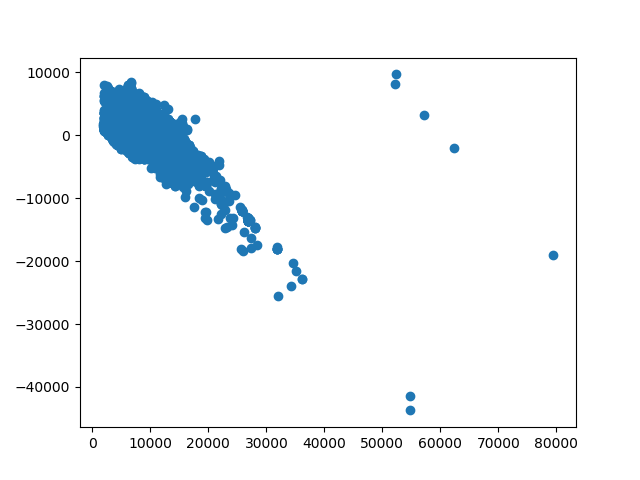

In [86]:
plt.scatter(y_train, pred-y_train)

In [82]:
mean_squared_log_error(y_train, pred)

0.09303765879002553

In [26]:
#####################  SVR model  ########################3
from sklearn.svm import SVR
from sklearn import preprocessing
import math

In [31]:
train = pd.read_excel('Data_Train.xlsx')
test= pd.read_excel('Test_set.xlsx')
train=transform(train)
test=transform(test)

In [32]:
columns = ['Airline','Day','journey','Dep_Time','Arrival_Time','Duration','Total_Stops']
X=train.loc[:,columns]
test=test.loc[:,columns]
cat_columns = ['Airline','Day','journey']
X=pd.get_dummies(X, prefix_sep="_",columns=cat_columns)
test=pd.get_dummies(test, prefix_sep="_",columns=cat_columns)
# col = ['Airline_Multiple carriers Premium economy','Airline_Vistara Premium economy']
# X = X.drop(columns=col)

In [33]:
X = X.drop(columns=['Airline_Trujet'])

In [34]:
y=train['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [35]:
len(test.columns)

27

In [25]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train.values)
X_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)
test_scaled = min_max_scaler.transform(test)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
svr=SVR(kernel='rbf',C=500000,gamma=1,epsilon=0.1)

In [28]:
svr.fit(X_scaled,y_train)

SVR(C=500000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
pred = svr.predict(X_scaled)
print('MSLE:',math.sqrt(mat.mean_squared_log_error(y_train, pred)),', MAPE:',mape(y_train, pred))

MSLE: 0.2285837894631764 , MAPE: 13.965375374567282


In [30]:
pred1 = svr.predict(X_test_scaled)#min_max_scaler.fit_transform(X_test))
print('MSLE:',math.sqrt(mat.mean_squared_log_error(y_test, abs(pred1))),', MAPE:',mape(y_test, pred1))

MSLE: 0.2656464980965973 , MAPE: 19.145233163018588


In [284]:
pred2 = svr.predict(test_scaled)

In [285]:
pd.DataFrame(pred2).to_excel('out.xlsx')

In [ ]:
1-math.sqrt(0.07535398377935344)

In [ ]:
#############################  GridSearch to get optimal parameter  ########################################
parameters = {'kernel': ['rbf'], 'C':[5000,50000],'gamma': [1,10],'epsilon':[0.1]}
svr = SVR()
clf = GridSearchCV(svr,parameters,scoring='neg_mean_squared_log_error',cv=5)
clf.fit(X_scaled,y_train)

In [209]:
pred = clf.predict(X_scaled)#min_max_scaler.fit_transform(X_test))
print('MSLE:',mat.mean_squared_log_error(y_train, pred),', MAPE:',mape(y_train, pred))

MSLE: 0.07414210222021807 , MAPE: 19.595122736551218


In [214]:
pred1 = clf.predict(X_test_scaled)#min_max_scaler.fit_transform(X_test))
print('MSLE:',mat.mean_squared_log_error(y_test, pred1),', MAPE:',mape(y_test, pred1))

MSLE: 0.08196400306721348 , MAPE: 22.967216980879993


In [213]:
clf.best_params_

{'C': 5000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}

<IPython.core.display.Javascript object>


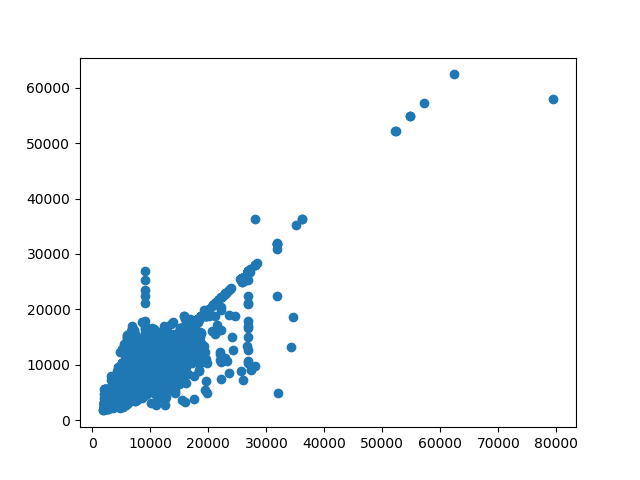

In [315]:
plt.scatter(y_train, pred)

In [37]:
###############  Random Forest
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor(max_depth=20, random_state=0,n_estimators=100,max_features=20)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [90]:
pred = rf.predict(X_train)
print('MSLE:',math.sqrt(mat.mean_squared_log_error(y_train, pred)),', MAPE:',mape(y_train, pred))

MSLE: 0.1656964010955488 , MAPE: 11.70570701755516


In [91]:
pred1 = rf.predict(X_test)
print('MSLE:',math.sqrt(mat.mean_squared_log_error(y_test, pred1)),', MAPE:',mape(y_test, pred1))

MSLE: 0.24353260304174762 , MAPE: 18.393700932156566


In [93]:
pred2 = rf.predict(test)
pd.DataFrame(pred2).to_excel('out.xlsx')

In [38]:
###############  Random Forest with grid search
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 20, 50],
    'max_features': [5,10,20],
    'min_samples_leaf': [2,5,10],
    'min_samples_split': [8,10,12],
    'n_estimators': [100, 200, 1000]
}
rf = RandomForestRegressor()

In [39]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2)

In [40]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 33.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': [2, 5, 10], 'max_features': [5, 10, 20], 'min_samples_split': [8, 10, 12], 'max_depth': [5, 10, 20, 50], 'n_estimators': [100, 200, 1000], 'bootstrap': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [41]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 200}

In [45]:
pred = grid_search.predict(X_train)
print('MSLE:',math.sqrt(mat.mean_squared_log_error(y_train, pred)),', MAPE:',mape(y_train, pred))

MSLE: 0.19411485065213857 , MAPE: 14.673767350554703


In [46]:
pred1 = grid_search.predict(X_test)
print('MSLE:',math.sqrt(mat.mean_squared_log_error(y_test, pred1)),', MAPE:',mape(y_test, pred1))

MSLE: 0.23114932620029066 , MAPE: 18.140274857884904


<IPython.core.display.Javascript object>


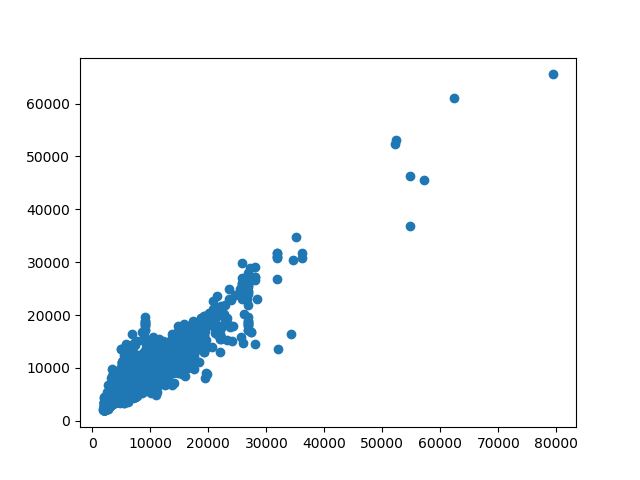

In [92]:
plt.scatter(y_train, pred)

<IPython.core.display.Javascript object>


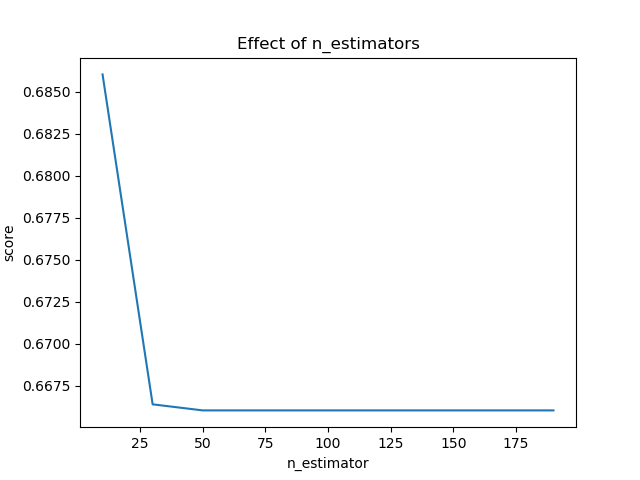

In [52]:
estimators = np.arange(10, 200, 20)
rf = RandomForestRegressor(random_state=0,n_estimators=120)
scores = []
for n in estimators:
    rf.set_params(max_depth=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [290]:
###############  Random Forest with categorical values


In [75]:
import seaborn as sns

In [85]:
flights=['Multiple carriers Premium economy','Jet Airways Business','Vistara Premium economy','Trujet']

In [96]:
def boxplot(df,x,y,hue=None):
    sns.boxplot(x=x, y=y, data=df,hue=hue, palette="Set1")# hue="Source"
    medians = df.groupby([x])[y].median().values
    nobs = df.groupby(x).size().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', 
                 size='medium', color='black', weight='semibold')
    

<IPython.core.display.Javascript object>


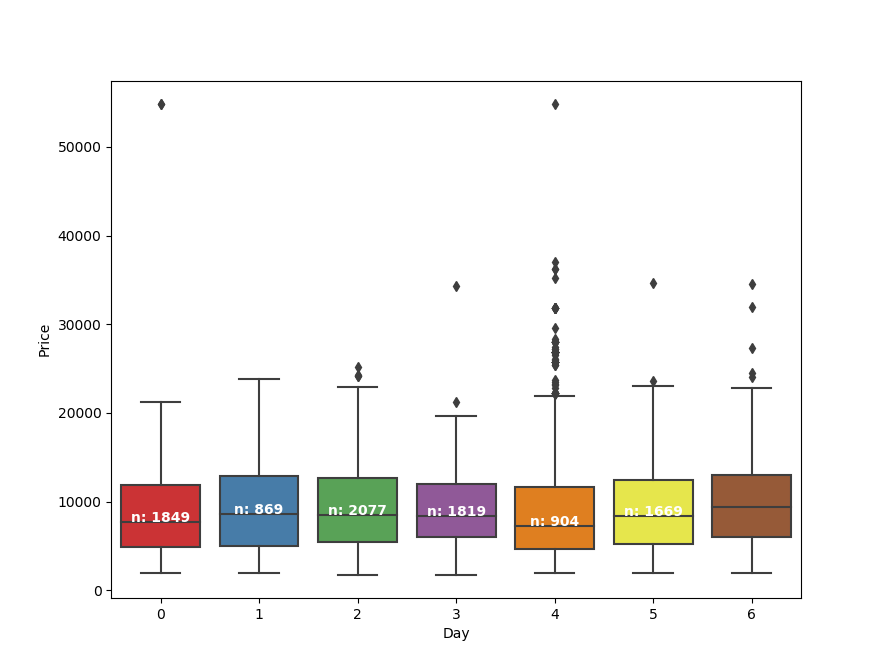

In [89]:
boxplot(train.loc[~(train['Airline'].isin(flights)),:],'Day','Price')

In [95]:
#train['meal']=train['Additional_Info'].apply(lambda x: 0 if x=='In-flight meal not included' else 1)
train = train.drop(columns='meal')

<IPython.core.display.Javascript object>


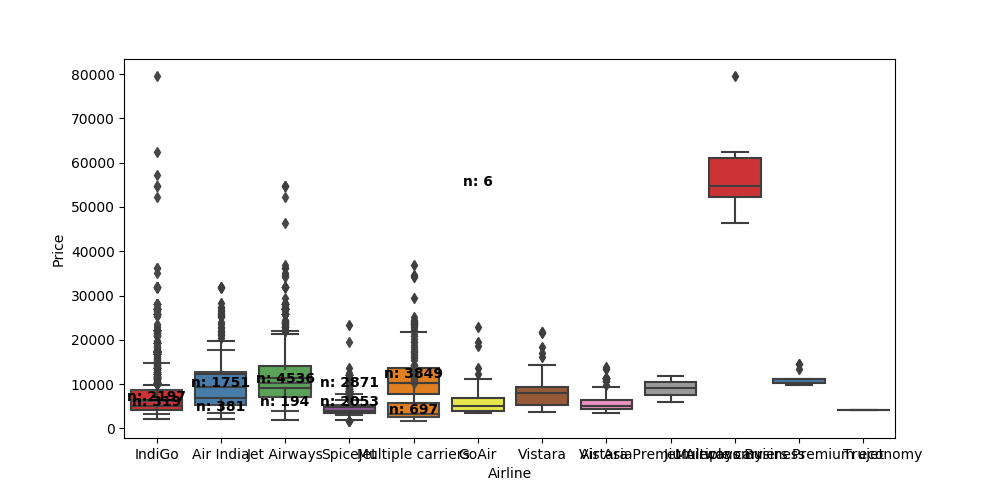

In [102]:
boxplot(train,'journey','Price')

In [155]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,journey,Airline1,wAirline,wJourney,flag,wDay
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,1340,70,170,0,No info,3897,6,Banglore-Delhi,IndiGo,5000,6121,1,9454
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,795,445,2,No info,7662,2,Kolkata-Banglore,Air India,9443,9345,0,8529
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,265,1140,2,No info,13882,6,Delhi-Cochin,Jet Airways,11467,10262,1,9454
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,1410,325,1,No info,6218,6,Kolkata-Banglore,IndiGo,5000,9345,1,9454
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,1010,1295,285,1,No info,13302,4,Banglore-Delhi,IndiGo,5000,6121,0,7229


In [157]:
train1.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,wAirline,wJourney,wDay
0,1340,70,170,0,5000,6121,9454
1,350,795,445,2,9443,9345,8529
2,565,265,1140,2,11467,10262,9454
3,1085,1410,325,1,5000,9345,9454
4,1010,1295,285,1,5000,6121,7229


In [178]:
#sns.lmplot(x="Arrival_Time", y="Price", hue="journey",truncate=True, height=5, data=train)
#sns.lmplot(x=y_test,y=pred,data=)

TypeError: only size-1 arrays can be converted to Python scalars

In [147]:
train['flag']=0
train.loc[(train['Day']==6)&(train['Arrival_Time']>1),'flag']=1
train.loc[(train['Day']==5)&(train['Arrival_Time']>1),'flag']=2

<IPython.core.display.Javascript object>


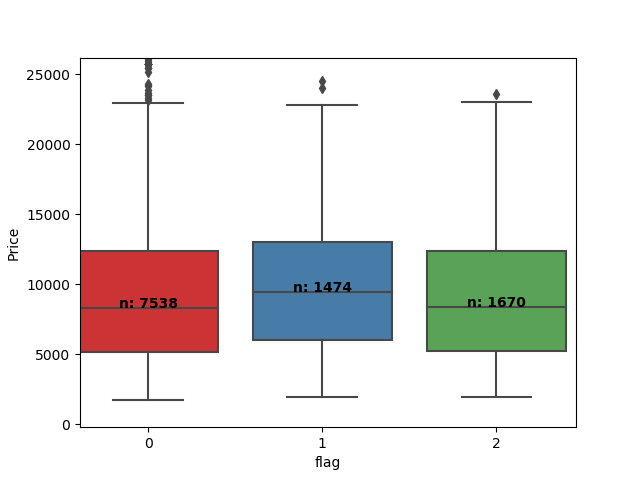

In [148]:
boxplot(train,'flag','Price')

In [64]:
######################  One hot encoding using 
df=pd.DataFrame([["Manchester", "bike", 30], ["Cambridge", "car", 40],["Liverpool", "bike", 10]], columns=["city", "transport", "duration"])
cat_columns = ["city", "transport"]
pd.get_dummies(df, prefix_sep="_",columns=cat_columns)

,duration,city_Cambridge,city_Liverpool,city_Manchester,transport_bike,transport_car
0,30,0,0,1,1,0
1,40,1,0,0,0,1
2,10,0,1,0,1,0


In [67]:
####################  One hot encoding using scikit learn
df=pd.DataFrame([["Manchester", "bike", 30], ["Cambridge", "car", 40],["Liverpool", "bike", 10]], columns=["city", "transport", "duration"])
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
onehotencoder.fit(df[cat_columns])
df1 = pd.concat([df.drop(cat_columns, 1),pd.DataFrame(onehotencoder.transform(df[cat_columns]))], axis=1).reindex()
df1

,duration,0,1,2,3,4
0,30,0.0,0.0,1.0,1.0,0.0
1,40,1.0,0.0,0.0,0.0,1.0
2,10,0.0,1.0,0.0,1.0,0.0


In [ ]:
################  use pipeline in modeling
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
    preprocessing.StandardScaler(),
    SVR(kernel='rbf', epsilon=0.01, C=100, gamma = 0.01),
)
pipeline.fit(X_train, TargetT)
y_hat = pipeline.predict(X_test)